Amazon Prime TV Shows and Movies

ID: The title ID on JustWatch.
title: The name of the title.
show type: TV show or movie.
description: A brief description.
release year: The release year.
age certification: The age certification.
runtime: The length of the episode (SHOW) or movie.
genres: A list of genres.
production countries: A list of countries that produced the title.
seasons: Number of seasons if it's a SHOW.
IMDB ID: The title ID on IMDB.
IMDB Score: Score on IMDB.
IMDB Votes: Votes on IMDB.
TMDB Popularity: Popularity on TMDB.
TMDB Score: Score on TMDB.

data retrieved from: https://www.kaggle.com/datasets/victorsoeiro/amazon-prime-tv-shows-and-movies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

amazon_df = pd.read_csv('datasets/amazon_titles.csv')
print(amazon_df.head()

        id                        title   type  \
0  ts20945            The Three Stooges   SHOW   
1  tm19248                  The General  MOVIE   
2  tm82253  The Best Years of Our Lives  MOVIE   
3  tm83884              His Girl Friday  MOVIE   
4  tm56584            In a Lonely Place  MOVIE   

                                         description  release_year  \
0  The Three Stooges were an American vaudeville ...          1934   
1  During America’s Civil War, Union spies steal ...          1926   
2  It's the hope that sustains the spirit of ever...          1946   
3  Hildy, the journalist former wife of newspaper...          1940   
4  An aspiring actress begins to suspect that her...          1950   

  age_certification  runtime  \
0             TV-PG       19   
1               NaN       78   
2               NaN      171   
3               NaN       92   
4               NaN       94   

                                              genres production_countries  \
0  ['com

In [5]:
amazon_df_movies_only = amazon_df[amazon_df['type'] == 'MOVIE']
amazon_movies_col_sub = amazon_df_movies_only[['title', 'release_year', 'runtime', 'genres', 'production_countries', 'imdb_score']]
print(amazon_movies_col_sub.head())

                         title  release_year  runtime  \
1                  The General          1926       78   
2  The Best Years of Our Lives          1946      171   
3              His Girl Friday          1940       92   
4            In a Lonely Place          1950       94   
5                   Stagecoach          1939       96   

                                              genres production_countries  \
1  ['action', 'drama', 'war', 'western', 'comedy'...               ['US']   
2                        ['romance', 'war', 'drama']               ['US']   
3                     ['comedy', 'drama', 'romance']               ['US']   
4                   ['thriller', 'drama', 'romance']               ['US']   
5                               ['western', 'drama']               ['US']   

   imdb_score  
1         8.2  
2         8.1  
3         7.8  
4         7.9  
5         7.8  


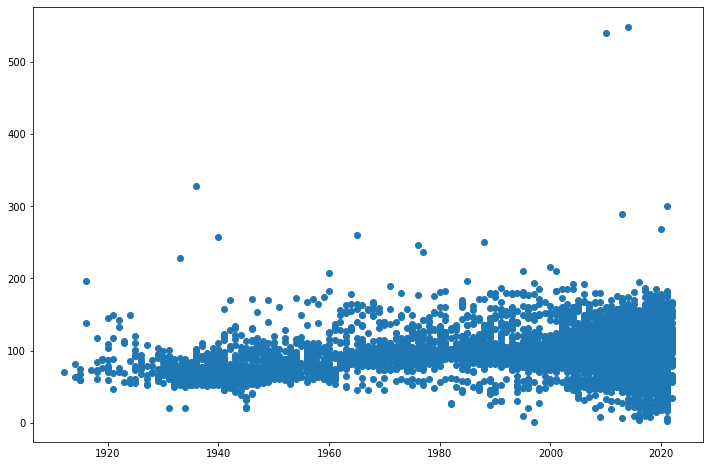

In [6]:
fig = plt.figure(figsize=(12,8))

x_axis = amazon_movies_col_sub[['release_year']]
y_axis = amazon_movies_col_sub[['runtime']]

plt.scatter(x_axis, y_axis)
plt.show()